In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.distributions as dist
import pandas as pd

In [21]:
true_pi=torch.pi
print("True value of pi: ",true_pi)
# true_pi=np.pi
# print("True value of pi: ",true_pi)

True value of pi:  3.141592653589793


In [22]:
xy=torch.rand(1,2)
print(xy)
x1=xy[:,0]
y1=xy[:,1]
print(x1)
print(y1)
distance=torch.sqrt((x1**2)+(y1**2))
print(distance)

tensor([[0.2251, 0.2900]])
tensor([0.2251])
tensor([0.2900])
tensor([0.3671])


In [23]:
def estimate_pi(N,seed):
    torch.manual_seed(seed)
    xy=torch.rand(N,2)
    distance=torch.sqrt((xy[:,0]**2)+(xy[:,1]**2))
    inside_circle=distance<=1.0
    point_inside_circle=inside_circle.sum()
    pi_estimate= (point_inside_circle/N)*4
    return pi_estimate

    


Text(0.5, 1.0, '3.140552')

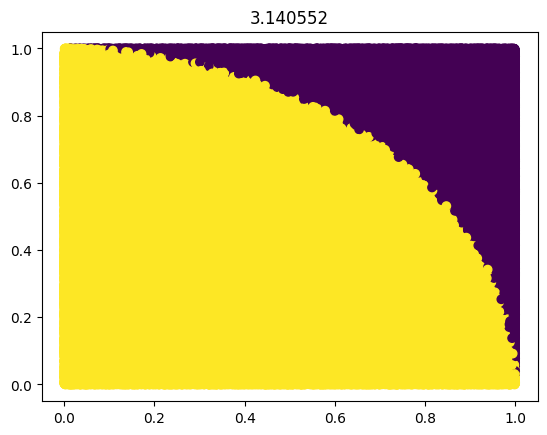

In [24]:
N=1000000
seed=42
pi_estimate=estimate_pi(N,seed=123)
xy=torch.rand(N,2)
x1=xy[:,0]
y1=xy[:,1]
distance=torch.sqrt(x1**2 + y1**2)
c=distance<=1.0
plt.scatter(x1,y1,c=c.float())
plt.title((c.sum().item()/N)*4)


In [25]:
#Different random seed and sample sizes
random_seed=[0,1,2,3,4]
log_sample_size=[1,2,3,4,5,6]
sample_sizes=[10**i for i in log_sample_size]
pi_estimates=[]
for seed in random_seed:
    for N in sample_sizes:
        pi_estimate=estimate_pi(N,seed)
        pi_estimates.append((seed,N,pi_estimate))
df=pd.DataFrame(pi_estimates,columns=["seed","log_sample_size","pi_estimate"])
df.head(20)        

,seed,log_sample_size,pi_estimate
0,0,10,tensor(3.2000)
1,0,100,tensor(3.2000)
2,0,1000,tensor(3.1400)
3,0,10000,tensor(3.1392)
4,0,100000,tensor(3.1372)
5,0,1000000,tensor(3.1405)
6,1,10,tensor(3.6000)
7,1,100,tensor(2.8800)
8,1,1000,tensor(3.0960)
9,1,10000,tensor(3.1440)


In [26]:
df=pd.DataFrame(pi_estimates,columns=["seed","N","pi_estimate"])
df_grouped=df.groupby("N").agg(["mean","std"])["pi_estimate"]
df_grouped

,mean,std
N,,
10,3.2,0.400000
100,3.088,0.148054
1000,3.112,0.028000
10000,3.14544,0.006258
100000,3.142896,0.004737
1000000,3.14241,0.001320


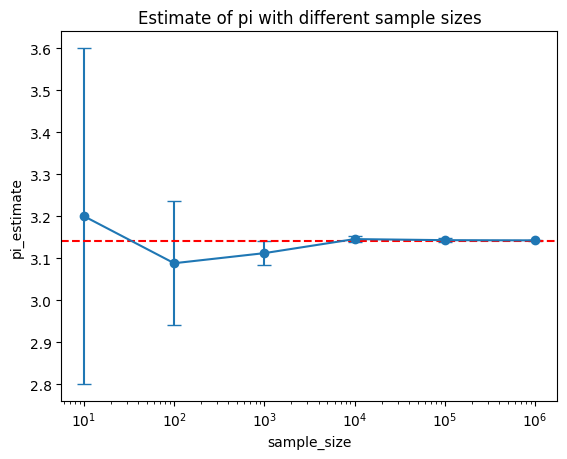

In [27]:
df_grouped['mean'].plot(yerr=df_grouped['std'],capsize=5,marker='o')
plt.axhline(y=true_pi,color="r",linestyle="--")
plt.xlabel("sample_size")
plt.ylabel("pi_estimate")
plt.title("Estimate of pi with different sample sizes");
plt.xscale("log")

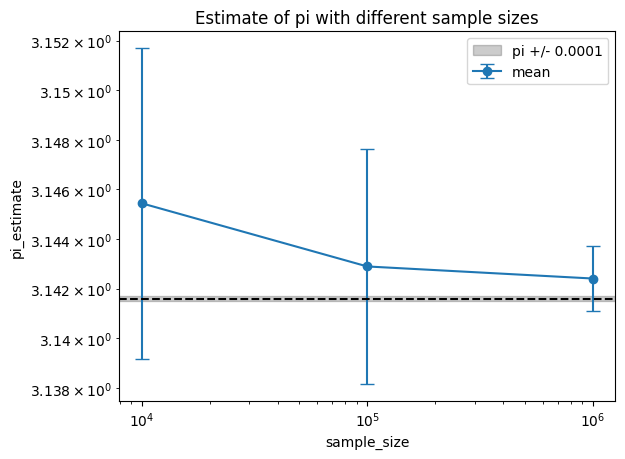

In [29]:
#plot only 10^4 and higher
subset=df_grouped.query("N>=10**4")
subset['mean'].plot(yerr=subset['std'],capsize=5,marker='o')
plt.xlabel("sample_size")
plt.ylabel("pi_estimate")
plt.title("Estimate of pi with different sample sizes");
plt.xscale("log")
plt.yscale("log")
plt.axhline(true_pi,color="black",linestyle="--")
plt.axhspan(true_pi-0.0001,true_pi+0.0001,color="black",alpha=0.2,label="pi +/- 0.0001")    
plt.legend();